<a href="https://colab.research.google.com/github/dfbrasil/Python/blob/main/Glicose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

### O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.

### Descrição dos Arquivos
### dataset_treino.csv - contém o conjunto de dados de treinamento
### dataset_teste.csv - contém o conjunto de dados de teste
### sampleSubmission.csv - contém o template para você enviar a sua solução

# Descrição dos Campos
#### num_gestacoes - Número de vezes grávida
#### glicose - Concentração plasmática de glicose em teste oral de tolerância à glicose
#### pressao_sanguinea - Pressão arterial diastólica em mm Hg
#### grossura_pele - Espessura da dobra da pele do tríceps em mm
#### insulina - Insulina em mu U / ml
#### bmi - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2
#### indice_historico - Índice de histórico de diabetes (Pedigree Function)
#### idade - Idade em anos
#### classe - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.base
import seaborn as sns
from sklearn import metrics
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import os
path = os.getcwd()


In [ ]:
# Conhecendo os arquivos
dataset = pd.read_csv('dataset_treino.csv',  sep = ",")

datasetTest = pd.read_csv('dataset_teste.csv',  sep = ",")

dataset.head(5)



#dim(dataset)
#colnames(dataset)

#dataset_teste = pd.read_csv('dataset_teste.csv',  sep = ",")

#dim(dataset_teste)
#colnames(dataset_teste)

#str(dataset)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
datasetTest.head(5)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,1,1,108,88,19,0,27.1,0.400,24
1,2,6,96,0,0,0,23.7,0.190,28
2,3,1,124,74,36,0,27.8,0.100,30
3,4,7,150,78,29,126,35.2,0.692,54
4,5,4,183,0,0,0,28.4,0.212,36


In [ ]:
#Retirar a colula ID
dataset.drop(columns='id', inplace=True) 
dataset.head(5)


,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


In [ ]:
dataset.describe()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.isnull().values.any()

False

# Análise Exploratória
---
* Exemplo de texto
* asdasd

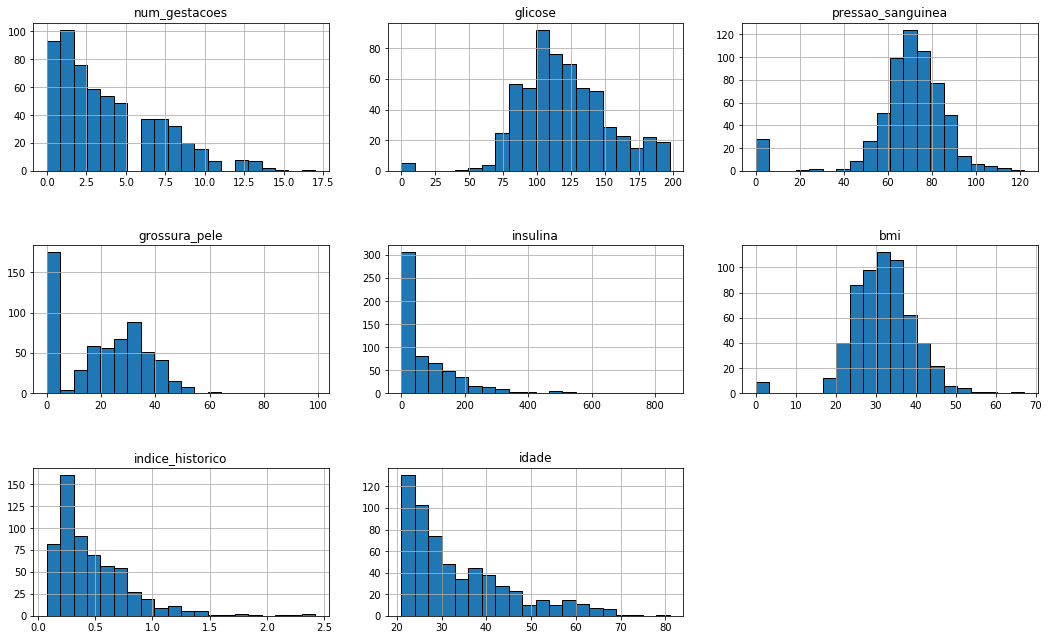

In [ ]:
colunas = dataset.columns[:8] #retirar a coluna classe
plt.subplots(figsize=(18,15))
lenght=len(colunas)
for i,j in zip(colunas,range(lenght)):
    plt.subplot((lenght/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

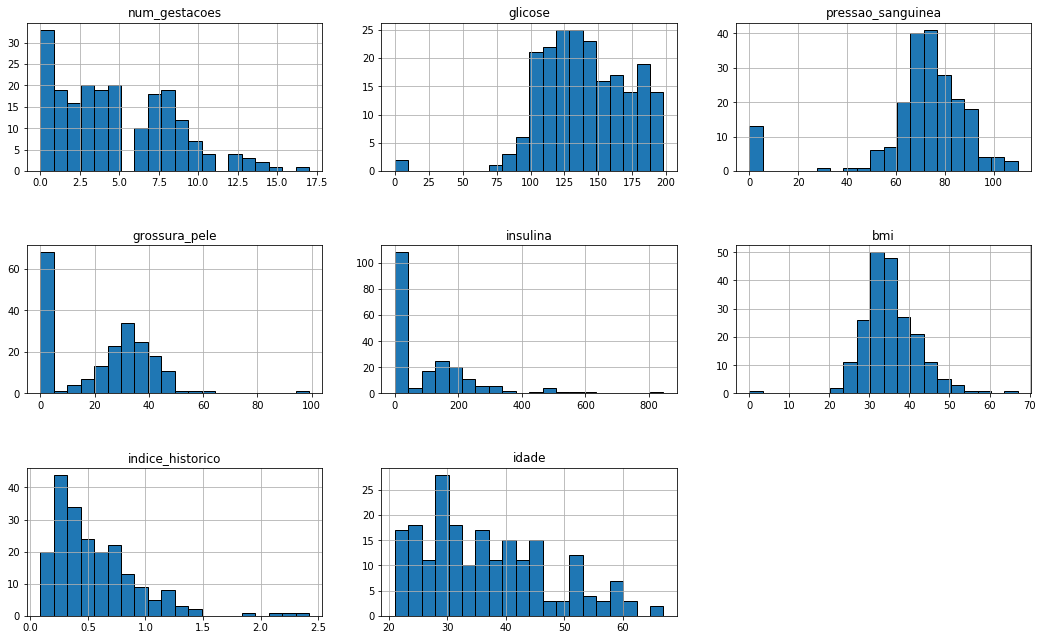

In [ ]:
#analisar a distribuição dos casos de diabetes
datasetGlicose = dataset[dataset['classe']==1] 
colunas = dataset.columns[:8]
plt.subplots(figsize=(18,15))
lenght=len(colunas)
for i,j in zip(colunas,range(lenght)):
    plt.subplot((lenght/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    datasetGlicose[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

num_gestacoes           AxesSubplot(0.125,0.657941;0.227941x0.222059)
glicose              AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pressao_sanguinea    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
grossura_pele           AxesSubplot(0.125,0.391471;0.227941x0.222059)
insulina             AxesSubplot(0.398529,0.391471;0.227941x0.222059)
bmi                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
indice_historico           AxesSubplot(0.125,0.125;0.227941x0.222059)
idade                   AxesSubplot(0.398529,0.125;0.227941x0.222059)
classe                  AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

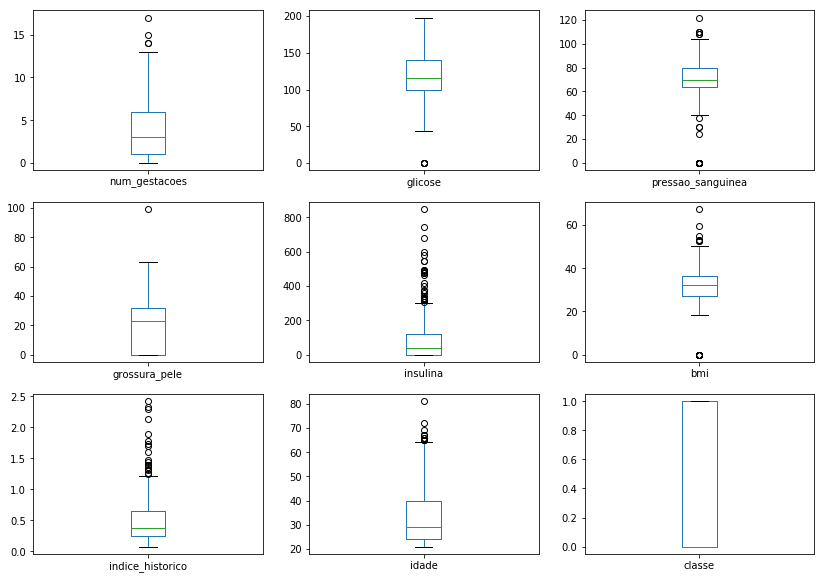

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(3,3),figsize=(14,10))

Text(0.5,0,'classe')

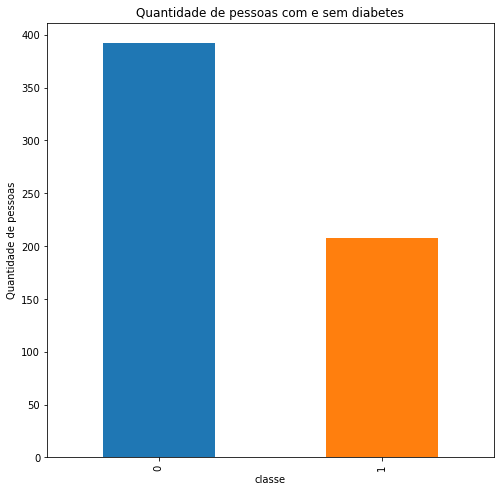

In [ ]:
dataset['classe'].value_counts().plot(kind='bar',figsize=(8,8))
plt.title('Quantidade de pessoas com e sem diabetes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('classe')


C:\Users\Aluisio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aluisio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aluisio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Aluisio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


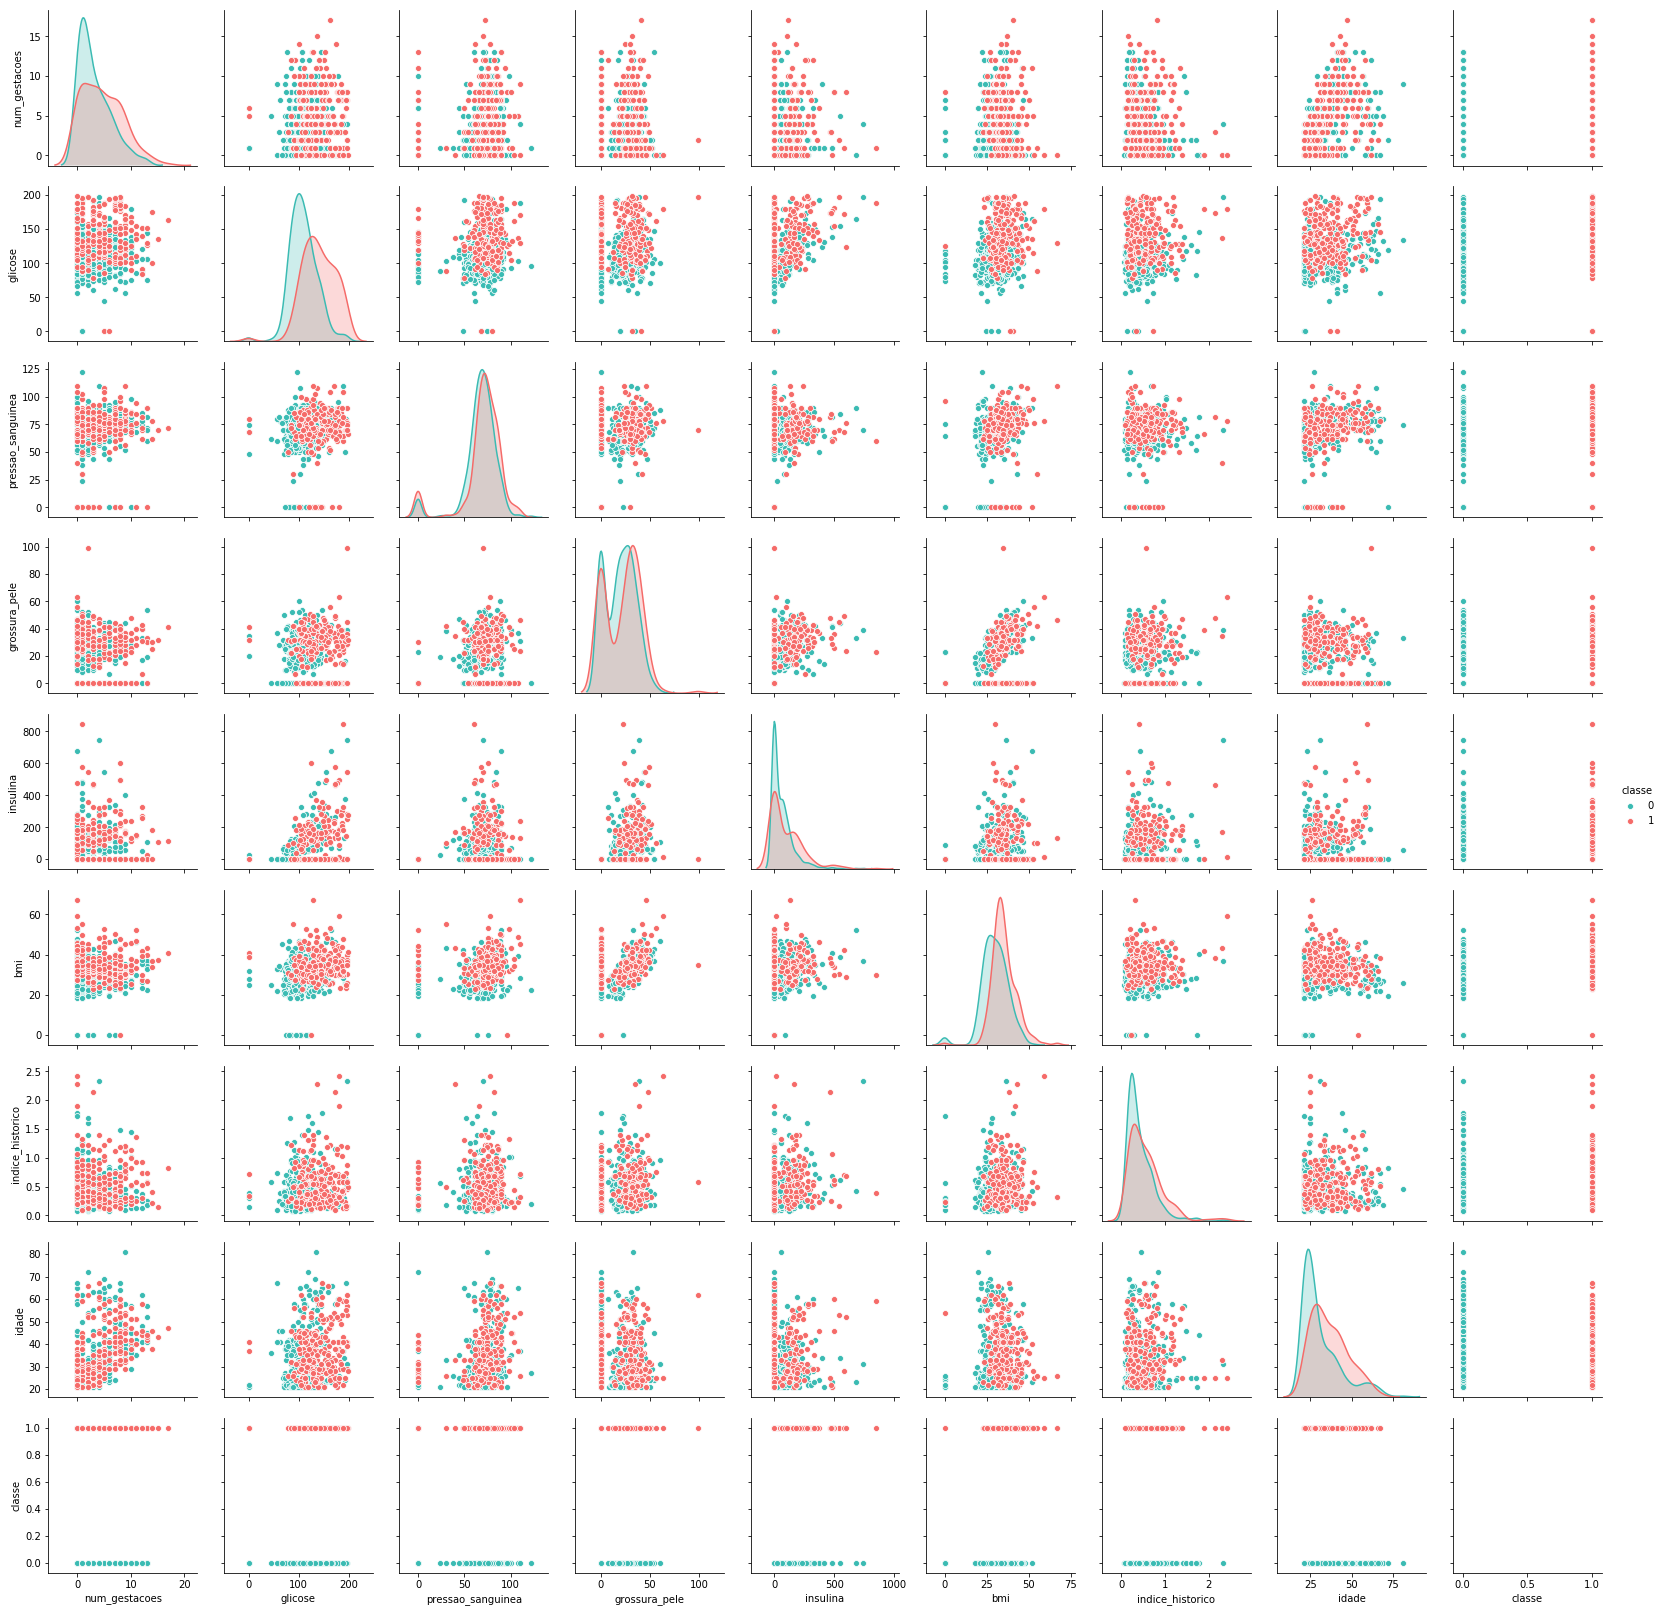

In [ ]:
sns.pairplot(data=dataset, hue='classe', diag_kind='kde', palette={1: '#f56b69', 0: '#3bbbb3'})
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B945C70>,
      dtype=object)

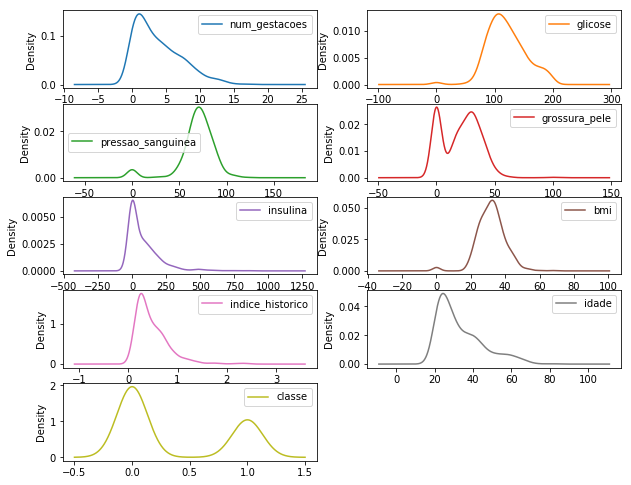

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(6,2),figsize=(10,10), sharex= False)

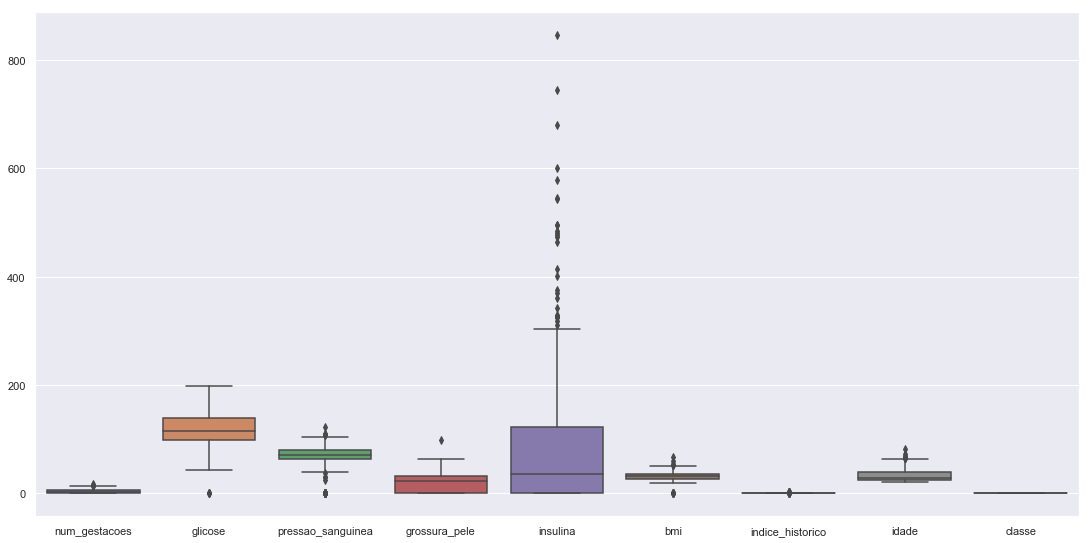

In [ ]:
sns.set(rc={'figure.figsize':(18.7,9.27)})
sns.boxplot(data=dataset, orient='v')

Variável alvo: classe
Variável preditoras: ['num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade']


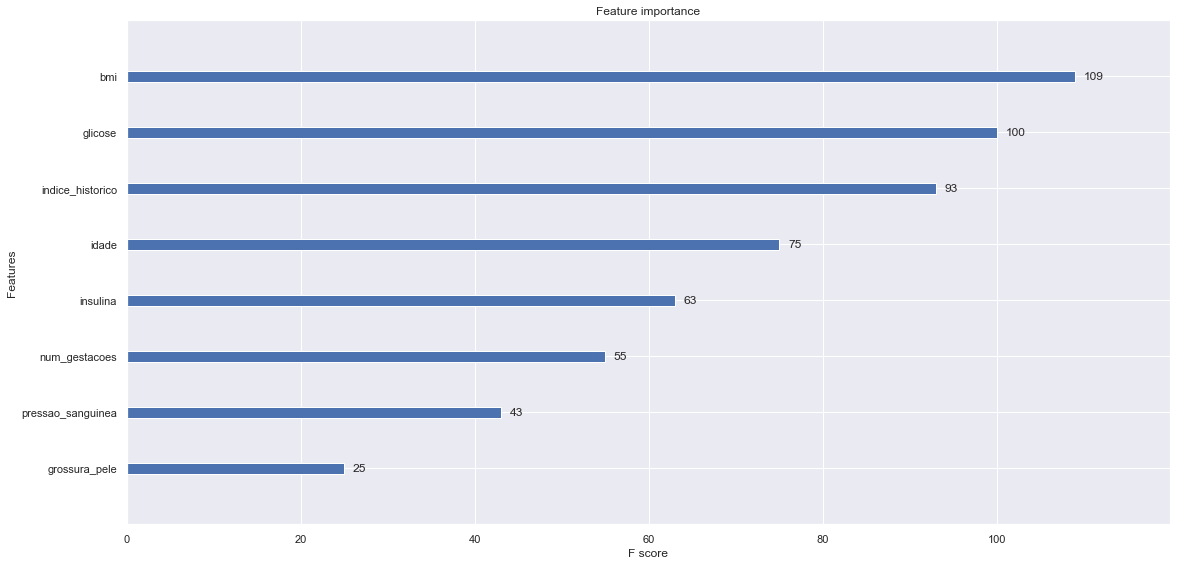

In [ ]:
#Separa as variáveis preditoras da variável alvo

target = 'classe'
features = dataset.columns.tolist()
features.remove(target)

X = dataset[features]
y = dataset[target]

print('Variável alvo:', target)
print('Variável preditoras:', features)

model = XGBClassifier()

model.fit(X, y)
plot_importance(model)
plt.show()

# Limpeza dos dados
* Eliminar valores nulos
* Substituir os valores zeros pela média dos dados ou eliminar
* FIltro de atribuitos com baixo variância
* mult-colinearidade - Duas colunas Iguas

In [ ]:
# Verificar valores 0
print("Number of missing values : " + repr(dataset[dataset.glicose == 0].shape[0]))
print(dataset[dataset.glicose == 0].groupby('classe')['classe'].count())

Number of missing values : 5
classe
0    3
1    2
Name: classe, dtype: int64


In [ ]:
# Replace zero value with the mean value of the classes
glicose_0 = dataset[(dataset['glicose']== 0)]
dataset[(dataset['glicose']== 0) & (dataset['classe'] == 0)] = glicose_0[glicose_0['classe']== 0].replace(0, dataset[(dataset['classe']== 0)].mean())
dataset[(dataset['glicose']== 0) & (dataset['classe'] == 1)] = glicose_0[glicose_0['classe']== 1].replace(0, dataset[(dataset['classe']== 1)].mean())

pressao_sanguinea_0 = dataset[(dataset['pressao_sanguinea']== 0)]
dataset[(dataset['pressao_sanguinea']== 0) & (dataset['classe'] == 0)] = pressao_sanguinea_0[pressao_sanguinea_0['classe']== 0].replace(0, dataset[(dataset['classe']== 0)].mean())
dataset[(dataset['pressao_sanguinea']== 0) & (dataset['classe'] == 1)] = pressao_sanguinea_0[pressao_sanguinea_0['classe']== 1].replace(0, dataset[(dataset['classe']== 1)].mean())

insulina_0 = dataset[(dataset['insulina']== 0)]
dataset[(dataset['insulina']== 0) & (dataset['classe'] == 0)] = insulina_0[insulina_0['classe']== 0].replace(0, dataset[(dataset['classe']== 0)].mean())
dataset[(dataset['insulina']== 0) & (dataset['classe'] == 1)] = insulina_0[insulina_0['classe']== 1].replace(0, dataset[(dataset['classe']== 1)].mean())

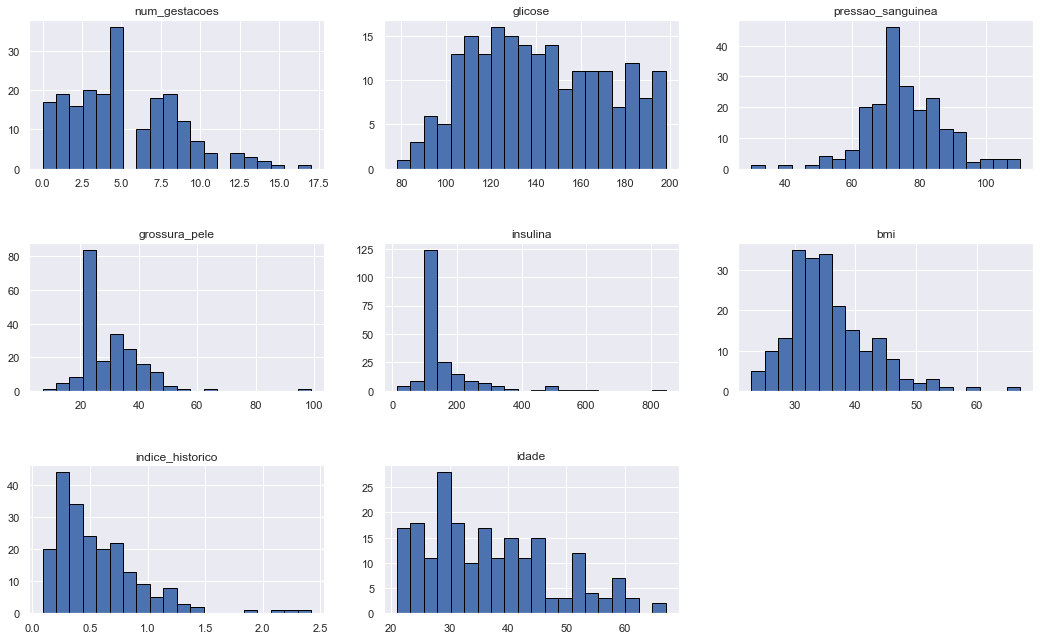

In [ ]:
#analisar a distribuição dos casos de diabetes
datasetGlicose = dataset[dataset['classe']==1] 
colunas = dataset.columns[:8]
plt.subplots(figsize=(18,15))
lenght=len(colunas)
for i,j in zip(colunas,range(lenght)):
    plt.subplot((lenght/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    datasetGlicose[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Variável alvo: classe
Variável preditoras: ['num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade']


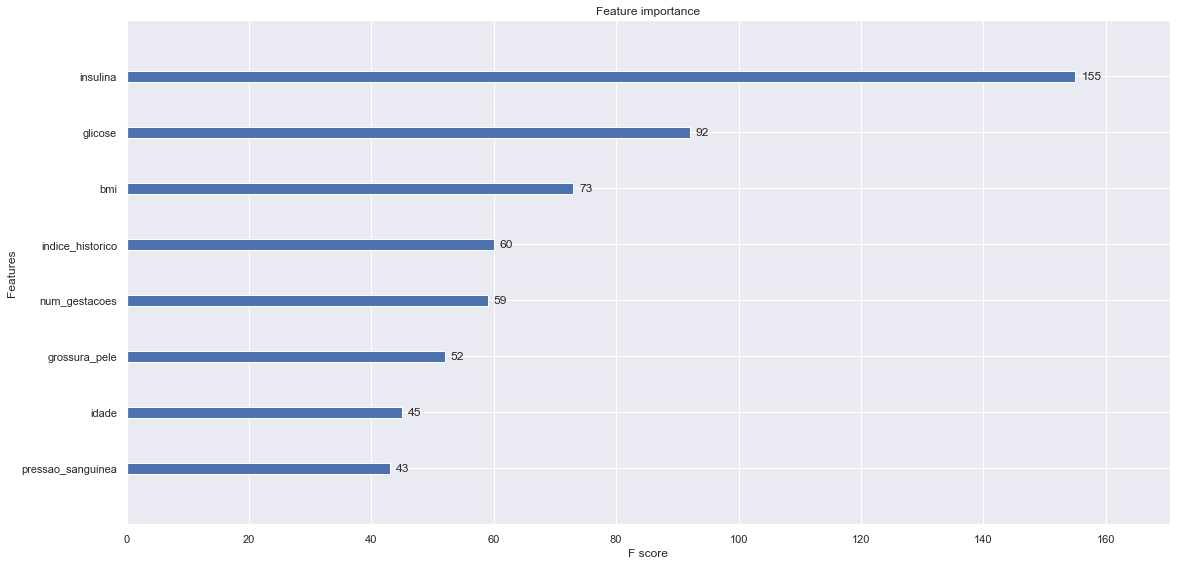

In [ ]:
#Separa as variáveis preditoras da variável alvo

target = 'classe'
features = dataset.columns.tolist()
features.remove(target)

X = dataset[features]
y = dataset[target]

print('Variável alvo:', target)
print('Variável preditoras:', features)

model = XGBClassifier()

model.fit(X, y)
plot_importance(model)
plt.show()

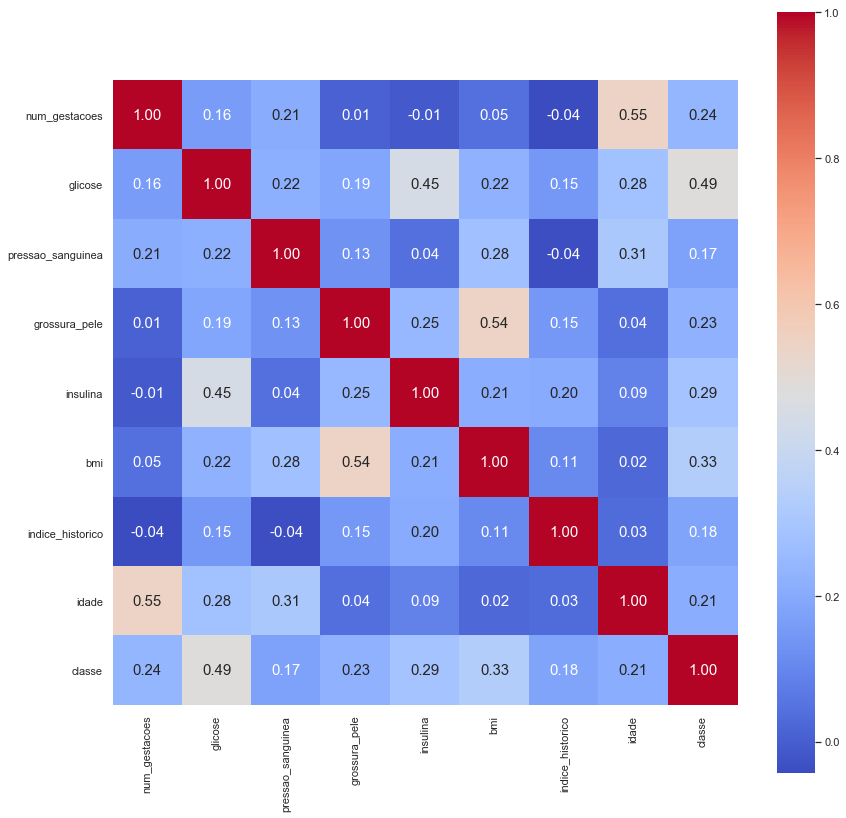

In [ ]:
correlacao = dataset.corr()
plt.figure(figsize=(14,14))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm')
plt.show()

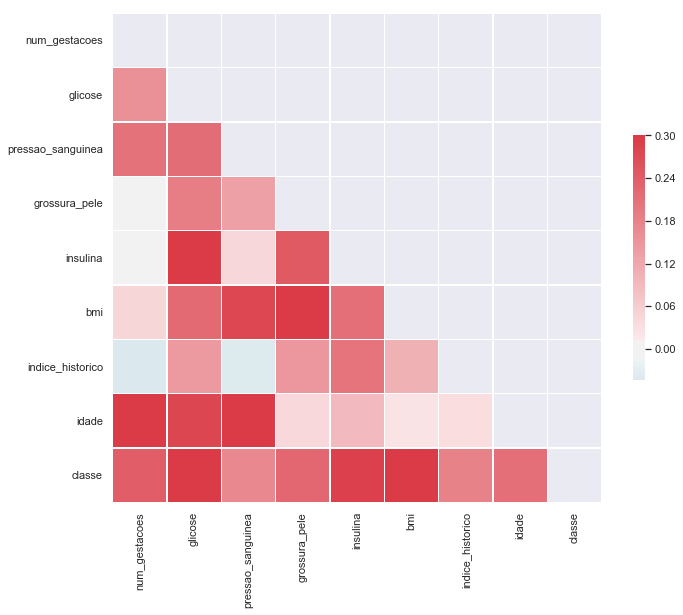

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pré-Processamento
## Normalizar o dados

In [ ]:
dataset.head()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,6.0,148.0,72.0,35.000000,110.231919,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,70.129003,26.6,0.351,31,0
2,8.0,183.0,64.0,23.503143,110.231919,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# Modelos Preditivos

## Balanciamento entre as classes



In [ ]:
#Balanciamento entre as classes

#!pip install imblearn

import imblearn

np.random.seed(75)
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(dataset, dataset.classe)

In [ ]:
data_o.shape

(784, 9)

In [ ]:
target_o.shape

(784,)

In [ ]:
import collections
collections.Counter(target_o)

Counter({1: 392, 0: 392})

In [ ]:
from sklearn.model_selection import train_test_split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data_o, target_o, test_size=0.20, random_state=4)

In [ ]:
# 20% para teste e 80% para treino

from sklearn import preprocessing
data_on = preprocessing.scale(data_o)
Xon_train, Xon_test, yon_train, yon_test = train_test_split(data_on, target_o, test_size=0.20, random_state=4)

In [ ]:
Xo_train.shape

(627, 9)

In [ ]:
yo_train.shape

(627,)

In [ ]:
yo_test.shape

(157,)

## Normalização

In [ ]:
data=dataset[dataset.columns[:8]]
target=dataset['classe']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = data.iloc[:, 0:8].columns
data[cols] = scaler.fit_transform(data)
data.head()

C:\Users\Aluisio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Aluisio\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,0.352941,0.675325,0.489796,0.304348,0.115663,0.500745,0.234415,0.483333
1,0.058824,0.266234,0.428571,0.239130,0.067463,0.396423,0.116567,0.166667
2,0.470588,0.902597,0.408163,0.179382,0.115663,0.347243,0.253629,0.183333
3,0.058824,0.292208,0.428571,0.173913,0.096154,0.418778,0.038002,0.000000
4,0.000000,0.603896,0.163265,0.304348,0.185096,0.642325,0.943638,0.200000


In [ ]:
train,test=train_test_split(dataset,test_size=0.20,random_state=437,stratify=dataset['classe'])# stratify the outcome

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['classe']
y_test=test['classe']

# Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
random_state=234
dtree = DecisionTreeClassifier(random_state=998)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print("Accuracy for Decision treeclassifier is",metrics.accuracy_score(pred,y_test))



Accuracy for Decision treeclassifier is 0.8333333333333334


In [ ]:
print('Confusion Matrix')
cm_dtree = confusion_matrix(y_test,pred)
print(cm_dtree)
print('\n')
rpt_dtree = classification_report(y_test,pred)
print(rpt_dtree)

Confusion Matrix
[[70  8]
 [12 30]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.88        78
           1       0.79      0.71      0.75        42

    accuracy                           0.83       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.83      0.83      0.83       120



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 5
# random state variable
rstate = 42
# initialize a random forest algorithm

rf = RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)

print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[66 12]
 [ 6 36]]


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        78
           1       0.75      0.86      0.80        42

    accuracy                           0.85       120
   macro avg       0.83      0.85      0.84       120
weighted avg       0.86      0.85      0.85       120



## Comparação entre modelos 

In [ ]:
temp=[]
classifier=['Decision Tree','Random Forest','KNN','KNN (Smote)']
models=[DecisionTreeClassifier(random_state=998),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate),KNeighborsClassifier(n_neighbors=6),"SMOTE"]
for i in models:
    model = i
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        model.fit(Xo_train,yo_train)
        pred1=model.predict(Xo_test)
        temp.append(metrics.accuracy_score(pred1,yo_test))
    else:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)    
        temp.append(metrics.accuracy_score(prediction,y_test))
        
models_dataframe=pd.DataFrame(temp,index=classifier)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Decision Tree,0.833333
Random Forest,0.850000
KNN,0.791667
KNN (Smote),0.910828


## XGBOOST

In [ ]:
#!pip install xgboost

from xgboost import XGBClassifier
params = {'max_depths': 1.0, 'max_features': 1, 
          'min_samples_leafs': 0.1, 'min_samples_splits': 0.1, 'n_estimators': 16}

n_estimators = 16
max_depths = 1.0
min_samples_splits = 0.1
min_samples_leafs = 0.1
max_features = 1

modelXGB = XGBClassifier(n_estimators = n_estimators,
                      max_depths = max_depths,
                      min_samples_splits = min_samples_splits,
                      min_samples_leafs = min_samples_leafs,
                      max_features = max_features
                     )
modelXGB.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3, max_depths=1.0,
              max_features=1, min_child_weight=1, min_samples_leafs=0.1,
              min_samples_splits=0.1, missing=None, n_estimators=16, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = modelXGB.predict(X_test)   


print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[64 14]
 [ 8 34]]


              precision    recall  f1-score   support

           0       0.89      0.82      0.85        78
           1       0.71      0.81      0.76        42

    accuracy                           0.82       120
   macro avg       0.80      0.82      0.80       120
weighted avg       0.83      0.82      0.82       120

